# Creating a grid

## The Grid object

In [1]:
from roms_tools import Grid

/home/x-uheede/.conda/envs/romstools-test/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We can create a ROMS grid, mask, topography, and vertical coordinate system by creating an instance of the `Grid` class. In this example our grid spans the Nordic Seas and has a horizontal resolution of 10km and 100 vertical layers.

In [2]:
%%time

grid = Grid(
    nx=250,  # number of grid points in x-direction
    ny=250,  # number of grid points in y-direction
    size_x=2500,  # domain size in x-direction (in km)
    size_y=2500,  # domain size in y-direction (in km)
    center_lon=-15,  # longitude of the center of the domain
    center_lat=65,  # latitude of the center of the domain
    rot=-30,  # rotation of the grid (in degrees)
    topography_source={
        "name": "SRTM15",
        "path": "/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    N=100,  # number of vertical layers
    verbose=True,
)

2026-02-03 12:34:21 - INFO - === Creating the horizontal grid ===
2026-02-03 12:34:21 - INFO - Total time: 0.102 seconds
2026-02-03 12:34:21 - INFO - ================================================================================================
2026-02-03 12:34:21 - INFO - === Deriving the mask from coastlines ===
2026-02-03 12:34:22 - INFO - Total time: 0.323 seconds
2026-02-03 12:34:22 - INFO - ================================================================================================
2026-02-03 12:34:22 - INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
2026-02-03 12:34:22 - INFO - Reading the topography data: 0.233 seconds
2026-02-03 12:34:24 - INFO - Regridding the topography: 0.569 seconds
2026-02-03 12:34:24 - INFO - Domain-wide topography smoothing: 0.014 seconds
2026-02-03 12:34:27 - INFO - Local topography smoothing: 2.388 seconds
2026-02-03 12:34:27 - INFO - Total time: 5.066 seconds
2026-02-03 12:34:27 - INFO - ========================

CPU times: user 4.66 s, sys: 424 ms, total: 5.08 s
Wall time: 5.52 s


We generated the grid with verbose mode enabled, allowing us to see which steps were taken and how long each took. As you can see from the printed output, the four main steps are as follows:

I. [Creating the horizontal grid](https://roms-tools.readthedocs.io/en/latest/methods.html#horizontal-grid)

II. [Creating the mask](https://roms-tools.readthedocs.io/en/latest/methods.html#mask)

III. [Generating the topography](https://roms-tools.readthedocs.io/en/latest/methods.html#topography)

IV. [Preparing the vertical coordinate system](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system)

We will explore steps II., III., and IV. in more detail later. For now, let's examine the grid variables that were created, which can be found in the `xarray.Dataset` object returned by the `.ds` property.

In [3]:
grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB 57.27 57.26 ... 64.56 64.48
    lon_rho       (eta_rho, xi_rho) float64 508kB 315.8 316.0 ... 22.61 22.7
    lat_u         (eta_rho, xi_u) float64 506kB 57.27 57.26 57.25 ... 64.6 64.52
    lon_u         (eta_rho, xi_u) float64 506kB 315.9 316.1 ... 22.56 22.66
    lat_v         (eta_v, xi_rho) float64 506kB 57.31 57.31 57.3 ... 64.54 64.46
    lon_v         (eta_v, xi_rho) float64 506kB 315.8 316.0 ... 22.52 22.61
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB 57.23 57.22 ... 64.46
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB 315.8 316.1 ... 22.84
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB -0.05794 -0.05794 ... -1.102
    f             (eta_rho, xi_rho) float64 508kB 0.0001223 ... 0.0001313
    pm            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    pn            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 254kB 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB 1 1 1 1 1 1 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 508kB 3.386e+03 3.386e+03 ... 71.21
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes: (12/14)
    title:                   ROMS grid created by ROMS-Tools
    roms_tools_version:      3.4.1.dev6+g4ece8caa3
    size_x:                  2500
    size_y:                  2500
    center_lon:              -15
    center_lat:              65
    ...                      ...
    topography_source_name:  SRTM15
    topography_source_path:  /anvil/projects/x-ees250129/Datasets/SRTM15/SRTM...
    hmin:                    5.0
    theta_s:                 5.0
    theta_b:                 2.0
    hc:                      300.0

Use the `.plot()` method to visualize the grid you just created, along with its bathymetry.

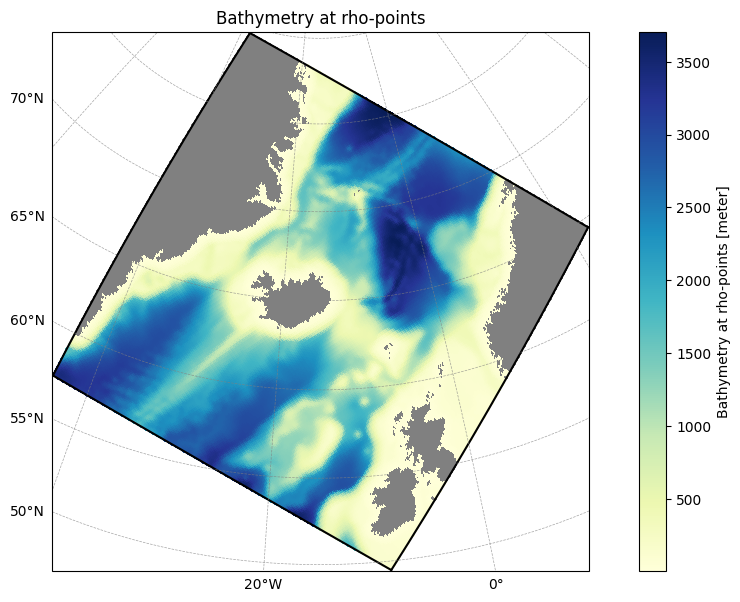

In [4]:
grid.plot()

We can also plot the grid along a fixed latitude or longitude to examine its bathymetry in cross-section.

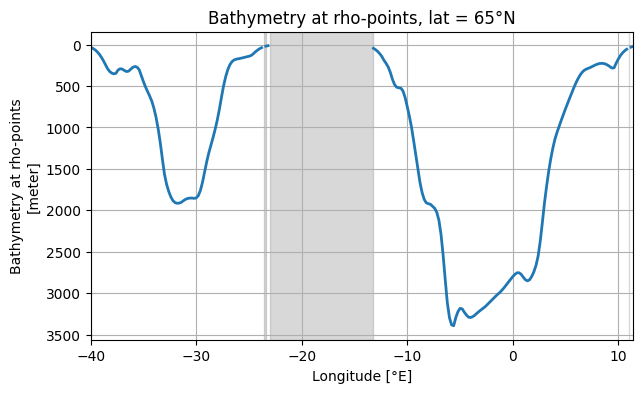

In [5]:
grid.plot(lat=65)

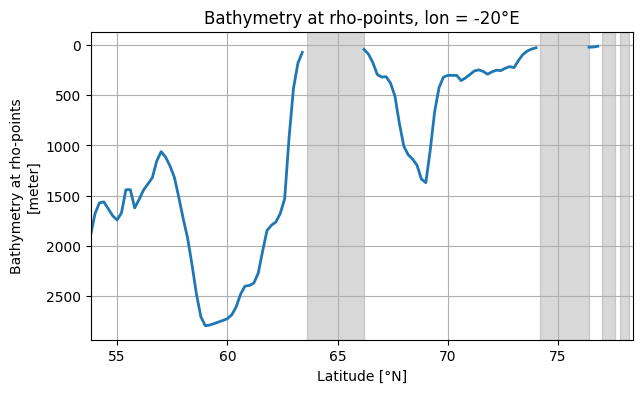

In [6]:
grid.plot(lon=-20)

### Saving as NetCDF or YAML file

Once we are happy with our grid, we can save it as a netCDF file via the `.save` method:

In [7]:
filepath = "/anvil/projects/x-ees250129/x-uheede/gridsmy_roms_grid.nc"

In [8]:
grid.save(filepath)

2026-02-03 12:34:29 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/gridsmy_roms_grid.nc


[PosixPath('/anvil/projects/x-ees250129/x-uheede/gridsmy_roms_grid.nc')]

We can also export the grid parameters to a YAML file. This gives us a more storage-effective way to save and share input data made with `ROMS-Tools`. The YAML file can be used to recreate the same grid object later.

In [9]:
yaml_filepath = "/anvil/projects/x-ees250129/x-uheede/grids/my_roms_grid.yaml"

In [10]:
grid.to_yaml(yaml_filepath)

These are the contents of the written YAML file.

In [11]:
# Open and read the YAML file
with open(yaml_filepath, "r") as file:
    file_contents = file.read()

# Print the contents
print(file_contents)

---
roms_tools_version: 3.4.1.dev6+g4ece8caa3
---
Grid:
  nx: 250
  ny: 250
  size_x: 2500
  size_y: 2500
  center_lon: -15
  center_lat: 65
  rot: -30
  N: 100
  theta_s: 5.0
  theta_b: 2.0
  hc: 300.0
  topography_source:
    name: SRTM15
    path: /anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc
  mask_shapefile: null
  hmin: 5.0



### Creating a grid from an existing NetCDF or YAML file

We can also create a grid from an existing file.

In [12]:
the_same_grid = Grid.from_file(filepath)

In [13]:
the_same_grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB ...
    lon_rho       (eta_rho, xi_rho) float64 508kB ...
    lat_u         (eta_rho, xi_u) float64 506kB ...
    lon_u         (eta_rho, xi_u) float64 506kB ...
    lat_v         (eta_v, xi_rho) float64 506kB ...
    lon_v         (eta_v, xi_rho) float64 506kB ...
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB ...
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB ...
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB ...
    f             (eta_rho, xi_rho) float64 508kB ...
    pm            (eta_rho, xi_rho) float64 508kB ...
    pn            (eta_rho, xi_rho) float64 508kB ...
    spherical     |S1 1B ...
    mask_rho      (eta_rho, xi_rho) int32 254kB ...
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB ...
    h             (eta_rho, xi_rho) float64 508kB ...
    sigma_r       (s_rho) float32 400B ...
    Cs_r          (s_rho) float32 400B ...
    sigma_w       (s_w) float32 404B ...
    Cs_w          (s_w) float32 404B ...
Attributes: (12/14)
    title:                   ROMS grid created by ROMS-Tools
    roms_tools_version:      3.4.1.dev6+g4ece8caa3
    size_x:                  2500
    size_y:                  2500
    center_lon:              -15
    center_lat:              65
    ...                      ...
    topography_source_name:  SRTM15
    topography_source_path:  /anvil/projects/x-ees250129/Datasets/SRTM15/SRTM...
    hmin:                    5.0
    theta_s:                 5.0
    theta_b:                 2.0
    hc:                      300.0

Alternatively, we can create a grid from an existing YAML file.

In [14]:
%time yet_the_same_grid = Grid.from_yaml(yaml_filepath, verbose=False)

CPU times: user 4.45 s, sys: 380 ms, total: 4.83 s
Wall time: 4.81 s


In [15]:
yet_the_same_grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB 57.27 57.26 ... 64.56 64.48
    lon_rho       (eta_rho, xi_rho) float64 508kB 315.8 316.0 ... 22.61 22.7
    lat_u         (eta_rho, xi_u) float64 506kB 57.27 57.26 57.25 ... 64.6 64.52
    lon_u         (eta_rho, xi_u) float64 506kB 315.9 316.1 ... 22.56 22.66
    lat_v         (eta_v, xi_rho) float64 506kB 57.31 57.31 57.3 ... 64.54 64.46
    lon_v         (eta_v, xi_rho) float64 506kB 315.8 316.0 ... 22.52 22.61
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB 57.23 57.22 ... 64.46
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB 315.8 316.1 ... 22.84
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB -0.05794 -0.05794 ... -1.102
    f             (eta_rho, xi_rho) float64 508kB 0.0001223 ... 0.0001313
    pm            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    pn            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 254kB 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB 1 1 1 1 1 1 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 508kB 3.386e+03 3.386e+03 ... 71.21
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes: (12/14)
    title:                   ROMS grid created by ROMS-Tools
    roms_tools_version:      3.4.1.dev6+g4ece8caa3
    size_x:                  2500
    size_y:                  2500
    center_lon:              -15
    center_lat:              65
    ...                      ...
    topography_source_name:  SRTM15
    topography_source_path:  /anvil/projects/x-ees250129/Datasets/SRTM15/SRTM...
    hmin:                    5.0
    theta_s:                 5.0
    theta_b:                 2.0
    hc:                      300.0

## Mask

The land–sea mask is generated by comparing the grid’s latitude and longitude coordinates with a coastline dataset provided as a shapefile. 

### Mask Shapefile

The coastline dataset is supplied through the `mask_shapefile` parameter when creating the grid object.

If no shapefile is provided, `ROMS-Tools` automatically falls back to the [Natural Earth](https://www.naturalearthdata.com/) 1:10m coastline dataset (used in the example above). The label *1:10m* refers to a map scale of **1:10,000,000**, which corresponds to an effective spatial resolution of approximately **1–5 km**.

To improve the accuracy of the land–sea mask, especially for fjords, narrow straits, and other complex coastal geometries, we next explore several resolutions of the [GSHHG](https://www.soest.hawaii.edu/pwessel/gshhg/index.html) coastline dataset.

GSHHG provides five resolutions:

- **f** (full): original highest-detail dataset  
- **h** (high): ~80% reduction in detail and file size  
- **i** (intermediate): another ~80% reduction  
- **l** (low): another ~80% reduction  
- **c** (crude): another ~80% reduction  

Higher-resolution versions offer more accurate coastlines but require substantially more memory when generating the mask. In the following, we therefore profile the memory usage.

In [16]:
%load_ext memory_profiler

We will compare the masks derived from Natural Earth and GSHHG for a ROMS grid representing **Hvalfjörður fjord in Iceland** at **50 m horizontal resolution**.

In [17]:
iceland_fjord_kwargs = {
    "nx": 800,
    "ny": 400,
    "size_x": 40,
    "size_y": 20,
    "center_lon": -21.76,
    "center_lat": 64.325,
    "rot": 0,
    "topography_source": {
        "name": "SRTM15",
        "path": "/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc"
    },  
    "N": 40
}

First, we create a land-sea mask using the default Natural Earth coastline (i.e., withouth specifying a `mask_shapefile`).

In [18]:
%%time
%%memit

fjord_grid_natural_earth = Grid(**iceland_fjord_kwargs, verbose=True)

2026-02-03 12:34:35 - INFO - === Creating the horizontal grid ===
2026-02-03 12:34:35 - INFO - Total time: 0.434 seconds
2026-02-03 12:34:35 - INFO - ================================================================================================
2026-02-03 12:34:35 - INFO - === Deriving the mask from coastlines ===
2026-02-03 12:34:36 - INFO - Total time: 0.415 seconds
2026-02-03 12:34:36 - INFO - ================================================================================================
2026-02-03 12:34:36 - INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
2026-02-03 12:34:36 - INFO - Reading the topography data: 0.014 seconds
2026-02-03 12:34:36 - INFO - Regridding the topography: 0.014 seconds
2026-02-03 12:34:36 - INFO - Domain-wide topography smoothing: 0.028 seconds
2026-02-03 12:34:37 - INFO - Local topography smoothing: 0.745 seconds
2026-02-03 12:34:37 - INFO - Total time: 0.814 seconds
2026-02-03 12:34:37 - INFO - ========================

peak memory: 891.48 MiB, increment: 99.02 MiB
CPU times: user 1.73 s, sys: 196 ms, total: 1.93 s
Wall time: 2 s


Mask creation was very fast (< 1 second), and the total memory footprint of the grid generation was small (< 1 GB). However, the next plot shows that the Natural Earth coastline provides only a coarse representation of Hvalfjörður, resulting in an overly smooth and poorly resolved shoreline.

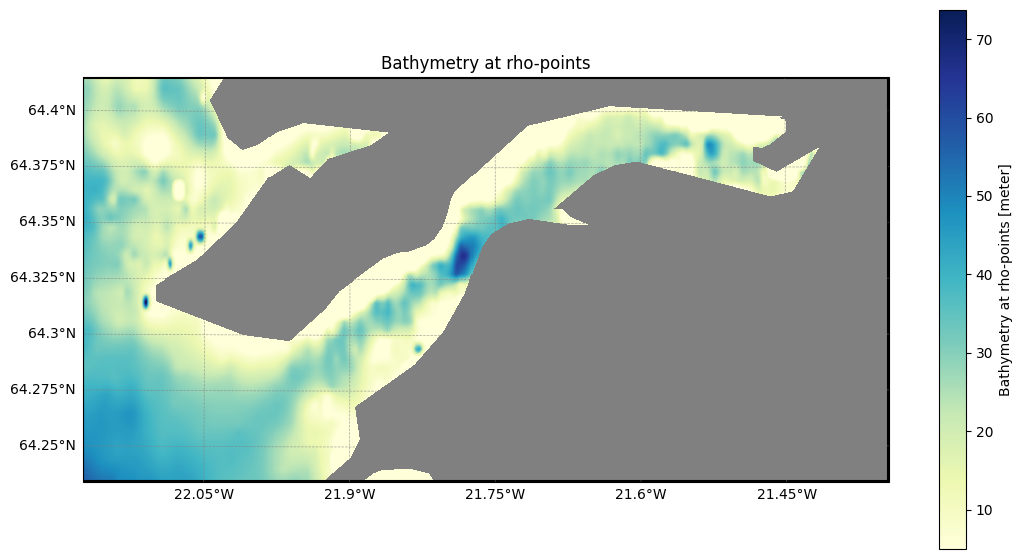

In [19]:
fjord_grid_natural_earth.plot()

Next, we explore the **high-resolution (h)** version of the GSHHG dataset to generate the land–sea mask.

In [20]:
%%time
%%memit

fjord_grid_gshhg_h = Grid(
    **iceland_fjord_kwargs, 
    mask_shapefile="/anvil/projects/x-ees250129/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/h/GSHHS_h_L1.shp", 
    verbose=True
)

2026-02-03 12:34:38 - INFO - === Creating the horizontal grid ===
2026-02-03 12:34:38 - INFO - Total time: 0.447 seconds
2026-02-03 12:34:38 - INFO - ================================================================================================
2026-02-03 12:34:38 - INFO - === Deriving the mask from coastlines ===
2026-02-03 12:34:54 - INFO - Total time: 16.062 seconds
2026-02-03 12:34:54 - INFO - ================================================================================================
2026-02-03 12:34:54 - INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
2026-02-03 12:34:54 - INFO - Reading the topography data: 0.015 seconds
2026-02-03 12:34:54 - INFO - Regridding the topography: 0.013 seconds
2026-02-03 12:34:55 - INFO - Domain-wide topography smoothing: 0.032 seconds
2026-02-03 12:34:55 - INFO - Local topography smoothing: 0.750 seconds
2026-02-03 12:34:55 - INFO - Total time: 0.823 seconds
2026-02-03 12:34:55 - INFO - =======================

peak memory: 45455.66 MiB, increment: 44581.87 MiB
CPU times: user 13.7 s, sys: 3.8 s, total: 17.5 s
Wall time: 17.7 s


Creating the mask now took about 15 seconds, and the overall memory footprint of the grid increased to roughly 45 GB: relatively high. The coastlines are better resolved than with Natural Earth, though still somewhat angular due to the data reduction applied in this GSHHG resolution.

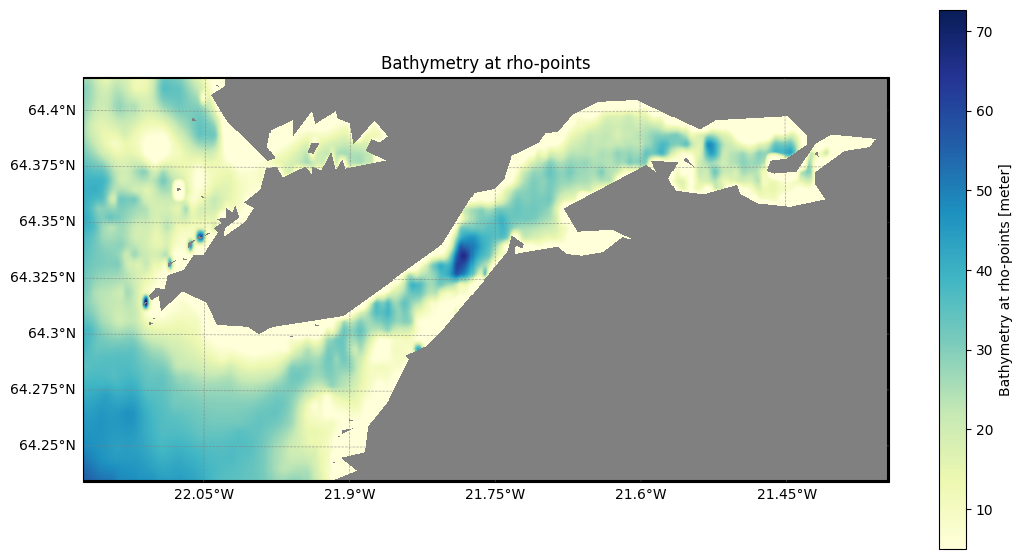

In [21]:
fjord_grid_gshhg_h.plot()

Finally, we use the **full-resolution** GSHHG dataset to generate the land–sea mask.

In [22]:
%%time
%%memit

fjord_grid_gshhg_f = Grid(
    **iceland_fjord_kwargs, 
    mask_shapefile="/anvil/projects/x-ees250129/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp", 
    verbose=True
)

2026-02-03 12:34:57 - INFO - === Creating the horizontal grid ===
2026-02-03 12:34:57 - INFO - Total time: 0.458 seconds
2026-02-03 12:34:57 - INFO - ================================================================================================
2026-02-03 12:34:57 - INFO - === Deriving the mask from coastlines ===
2026-02-03 12:35:17 - INFO - Total time: 20.386 seconds
2026-02-03 12:35:17 - INFO - ================================================================================================
2026-02-03 12:35:18 - INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
2026-02-03 12:35:18 - INFO - Reading the topography data: 0.013 seconds
2026-02-03 12:35:18 - INFO - Regridding the topography: 0.014 seconds
2026-02-03 12:35:18 - INFO - Domain-wide topography smoothing: 0.026 seconds
2026-02-03 12:35:18 - INFO - Local topography smoothing: 0.739 seconds
2026-02-03 12:35:18 - INFO - Total time: 0.806 seconds
2026-02-03 12:35:18 - INFO - =======================

peak memory: 56531.09 MiB, increment: 55623.13 MiB
CPU times: user 17 s, sys: 4.79 s, total: 21.8 s
Wall time: 22 s


Creating the mask now took about 20 seconds, and the grid’s memory footprint increased to roughly 55 GB: even higher. However, the coastline is captured in much greater detail using the full-resolution GSHHG data.

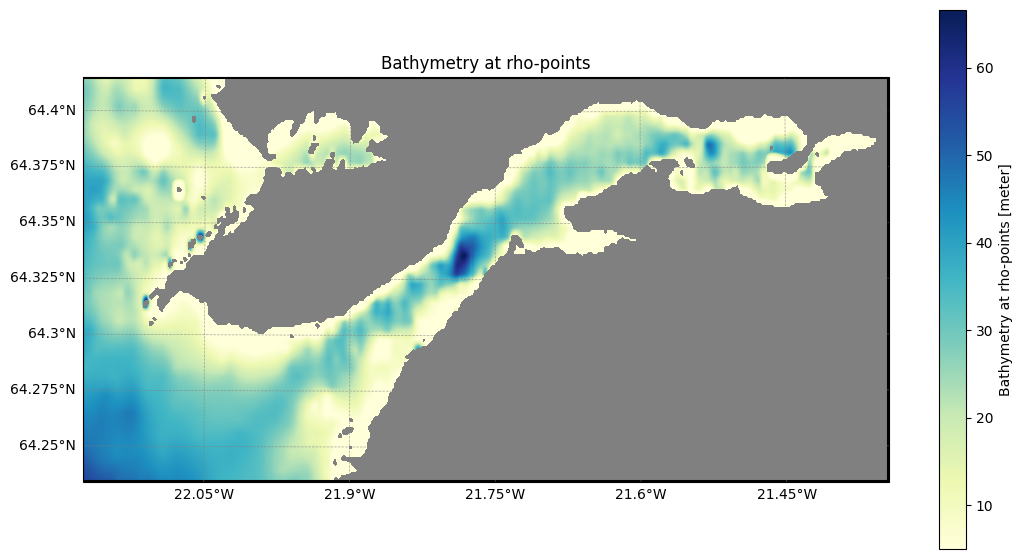

In [23]:
fjord_grid_gshhg_f.plot()

<div class="alert alert-info">

Note

For very large grids with many points, using the full-resolution GSHHG dataset may exceed available memory. You may need to experiment to find the optimal coastline resolution. For most applications, the Natural Earth coastlines may provide a sufficiently accurate representation.
</div>

### Closing narrow channels and holes

When creating a grid, you have the option to set `close_narrow_channels` to `True`. This functionality cleans up the land-sea mask by removing narrow 1-pixel wide passages and filling small isolated regions (holes). This is particularly useful when working with high-resolution coastline datasets that may create unrealistic narrow channels or small isolated water bodies that could cause numerical issues in ROMS.

The method performs two main operations:

1. **Closes narrow 1-pixel channels**: Iteratively removes 1-pixel wide land passages in both north-south and east-west directions. These narrow passages can create connectivity issues in the model.

2. **Fills holes**: Identifies connected regions in the mask and keeps only the largest region, unless another region exceeds a specified minimum fraction of the domain size. This removes small isolated water bodies while preserving larger secondary basins.

After closing, the velocity masks (`mask_u` and `mask_v`) are automatically updated to reflect the changes in `mask_rho`.


Let's create two grids and look at the difference to demonstrate the functionality. We'll use a grid with a relatively high resolution to show how narrow passages can be problematic.

In [ ]:
# Create a fine-scale grid for demonstration

narrow_channel_false_grid = Grid(
    nx=512,
    ny=512,
    size_x=102.4,
    size_y=102.4,
    center_lon=-22.3,
    center_lat=64.39,
    rot=0,
    mask_shapefile="/anvil/projects/x-ees250129/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp",
    topography_source={
        "name": "EMOD",
        "path": "/anvil/projects/x-ees250129/Datasets/EMODnet_C2.nc"},
    N=60  # number of vertical layers
    fill_narrow_channels=False #this is the default
)

narrow_channel_false_grid.plot()

Now, let's create the same grid, but with `close_narrow_channels` set to `True` and look at the difference.

In [ ]:
narrow_channel_true_grid = Grid(
    nx=512,
    ny=512,
    size_x=102.4,
    size_y=102.4,
    center_lon=-22.3,
    center_lat=64.39,
    rot=0,
    mask_shapefile="/anvil/projects/x-ees250129/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp",
    topography_source={
        "name": "EMOD",
        "path": "/anvil/projects/x-ees250129/Datasets/EMODnet_C2.nc"},
    N=60  # number of vertical layers
    fill_narrow_channels=True #this is the default
)

from roms_tools.plot import plot

# Plot the difference (areas that were changed)
mask_diff = narrow_channel_false_grid.ds.mask_rho - narrow_channel_true_grid.ds.mask_rho
plot(mask_diff, grid_ds=demo_grid.ds, apply_mask=False)

The plot above shows where the mask was modified. Red areas indicate where water was converted to land mask.

### Updating the mask

If you want to update the land–sea mask while keeping the existing horizontal grid, topography, and vertical coordinate system, you can skip Steps I, III, and IV. This can be easily done using the `.update_mask` method. 

Here, we update the grid created at the beginning of this notebook (using the Natural Earth coastlines) with a mask derived from the GSHHG dataset.

In [24]:
%%time
%%memit

grid.update_mask(
    mask_shapefile="/anvil/projects/x-ees250129/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp",
    verbose=True
)

2026-02-03 12:35:20 - INFO - === Deriving the mask from coastlines ===
2026-02-03 12:35:24 - INFO - Total time: 4.551 seconds
2026-02-03 12:35:24 - INFO - ================================================================================================


peak memory: 12156.09 MiB, increment: 11090.74 MiB
CPU times: user 3.47 s, sys: 1.27 s, total: 4.74 s
Wall time: 4.86 s


The new shapefile is now also recorded in the grid attributes.

In [25]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc'}, mask_shapefile='/anvil/projects/x-ees250129/Datasets/GSHHS/gshhg-shp-2.3.7/GSHHS_shp/f/GSHHS_f_L1.shp', hmin=5.0, verbose=True, straddle=True)

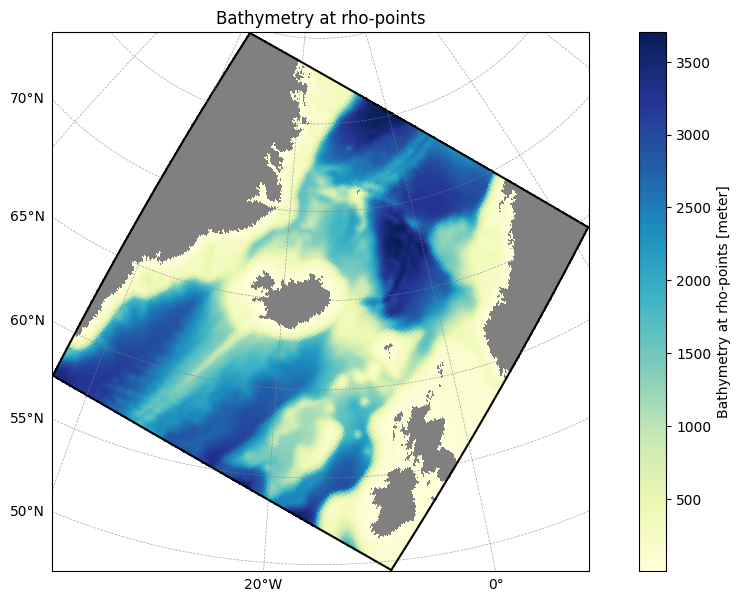

In [26]:
grid.plot()

Let's save a copy of the mask before updating the grid again to switch back to the Natural Earth–derived mask.

In [27]:
nordic_mask_gshhg = grid.ds.mask_rho.copy()

We now switch back to the Natural Earth–derived mask.

In [28]:
grid.update_mask(
    verbose=True
)

2026-02-03 12:35:25 - INFO - === Deriving the mask from coastlines ===
2026-02-03 12:35:25 - INFO - Total time: 0.192 seconds
2026-02-03 12:35:25 - INFO - ================================================================================================


In [29]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

In [30]:
nordic_mask_natural_earth = grid.ds.mask_rho.copy()

The next plot shows the difference between the two masks.

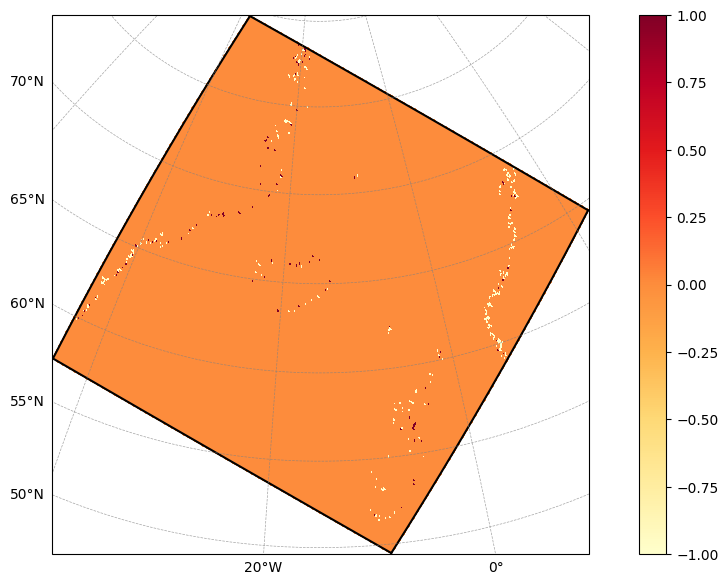

In [31]:
from roms_tools.plot import plot
plot(nordic_mask_gshhg - nordic_mask_natural_earth, grid_ds=grid.ds, apply_mask=False)

The red and yellow dots along the coastline show where the two coastline datasets produce different land-sea masks.

## Topography

[Here](https://roms-tools.readthedocs.io/en/latest/methods.html#topography-and-mask) you can find an overview of the steps involved in the topography generation. In the following, we will illustrate how these concepts work in practice.

### Topography source data

The grid object includes a parameter called `topography_source`. If this parameter is not specified, it defaults to using the ETOPO5 topography data. The ETOPO5 data is downloaded internally, so the user does not need to provide a filename. 

The ETOPO5 data has a horizontal resolution of 5 arc-minutes (or 1/12th of a degree). This horizontal resolution may be sufficient for coarser-resolution grids, but for finer-resolution grids we might want to use the finer-resolution topography product SRTM15. SRTM15 has a horizontal resolution of 15 arc-seconds (or 1/240th of a degree). 

Let's compare the topographies that are generated from ETOPO5 versus SRTM15 data for a ROMS grid surrounding Iceland.

In [32]:
iceland_kwargs = {
    "size_x": 800,
    "size_y": 800,
    "center_lon": -19,
    "center_lat": 65,
    "rot": 20,
}

First, we generate two "coarse-resolution" grids with a horizontal resolution of 800km/100 = 8km: one regridded from the ETOPO5 data and the other from the SRTM15 data.

In [33]:
%%time

coarse_grid_ETOPO5 = Grid(nx=100, ny=100, **iceland_kwargs, verbose=False)

CPU times: user 1.35 s, sys: 24.2 ms, total: 1.37 s
Wall time: 1.39 s


In [34]:
%%time

coarse_grid_SRTM15 = Grid(
    nx=100,
    ny=100,
    topography_source={
        "name": "SRTM15",
        "path": "/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    **iceland_kwargs,
    verbose=False
)

CPU times: user 1.56 s, sys: 55.3 ms, total: 1.61 s
Wall time: 1.61 s


Comparing the timings above, we can see that generating the topographies took a similar amount of time and was quick overall. Next, let’s compare the generated topography fields.

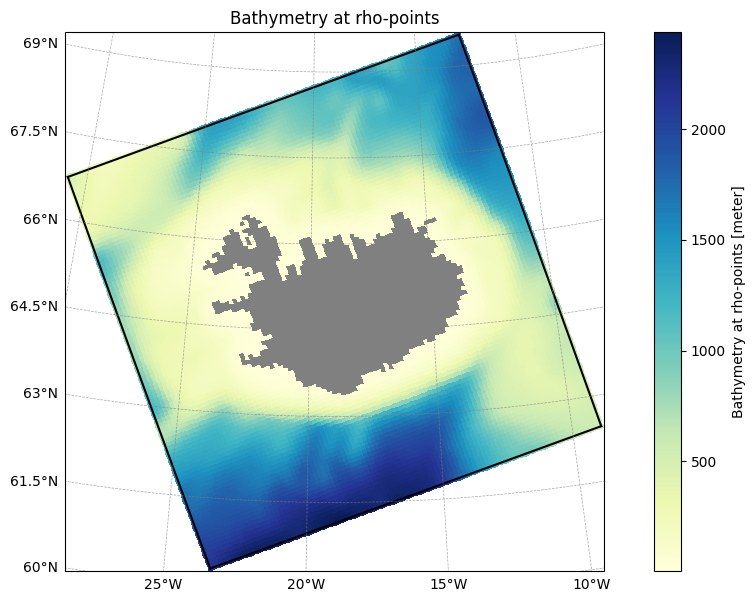

In [35]:
coarse_grid_ETOPO5.plot()

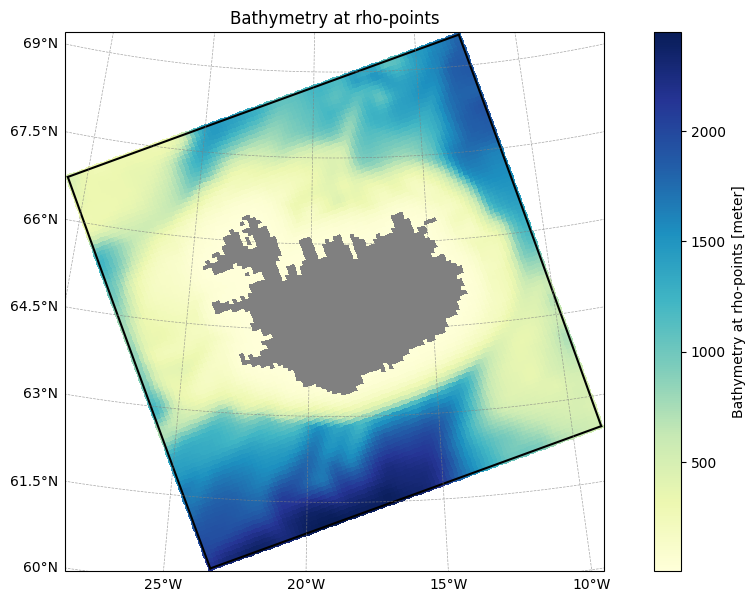

In [36]:
coarse_grid_SRTM15.plot()

Comparing the figures above, we don’t see significant differences in the generated topography fields. The grid is simply too coarse to fully utilize the high-resolution SRTM15 data! To observe more noticeable differences, we need to use a finer resolution grid.

Let's do that! Next, we generate two fine-resolution grids with a horizontal resolution of 800km/5000 = 0.16km: one regridded from the ETOPO5 data and the other from the SRTM15 data.

In [37]:
%%time

fine_grid = Grid(nx=5000, ny=5000, **iceland_kwargs, verbose=True)

2026-02-03 12:35:30 - INFO - === Creating the horizontal grid ===
2026-02-03 12:36:06 - INFO - Total time: 36.520 seconds
2026-02-03 12:36:06 - INFO - ================================================================================================
2026-02-03 12:36:06 - INFO - === Deriving the mask from coastlines ===
2026-02-03 12:36:39 - INFO - Total time: 32.335 seconds
2026-02-03 12:36:39 - INFO - ================================================================================================
2026-02-03 12:36:39 - INFO - === Generating the topography using ETOPO5 data and hmin = 5.0 meters ===
2026-02-03 12:36:39 - INFO - Reading the topography data: 0.025 seconds
2026-02-03 12:36:40 - INFO - Regridding the topography: 0.860 seconds
2026-02-03 12:36:45 - INFO - Domain-wide topography smoothing: 4.415 seconds
2026-02-03 12:38:05 - INFO - Local topography smoothing: 80.045 seconds
2026-02-03 12:38:05 - INFO - Total time: 85.450 seconds
2026-02-03 12:38:05 - INFO - ====================

CPU times: user 2min 15s, sys: 20.4 s, total: 2min 35s
Wall time: 2min 35s


In [38]:
%%time

fine_grid_SRTM15 = Grid(
    nx=5000,
    ny=5000,
    topography_source={
        "name": "SRTM15",
        "path": "/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    **iceland_kwargs,
    verbose=True
)

2026-02-03 12:38:05 - INFO - === Creating the horizontal grid ===
2026-02-03 12:38:40 - INFO - Total time: 35.267 seconds
2026-02-03 12:38:40 - INFO - ================================================================================================
2026-02-03 12:38:40 - INFO - === Deriving the mask from coastlines ===
2026-02-03 12:39:13 - INFO - Total time: 32.611 seconds
2026-02-03 12:39:13 - INFO - ================================================================================================
2026-02-03 12:39:14 - INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
2026-02-03 12:39:14 - INFO - Reading the topography data: 0.011 seconds
2026-02-03 12:39:15 - INFO - Regridding the topography: 1.474 seconds
2026-02-03 12:39:20 - INFO - Domain-wide topography smoothing: 4.649 seconds
2026-02-03 12:41:06 - INFO - Local topography smoothing: 106.373 seconds
2026-02-03 12:41:06 - INFO - Total time: 112.790 seconds
2026-02-03 12:41:06 - INFO - ==================

CPU times: user 2min 23s, sys: 38.9 s, total: 3min 2s
Wall time: 3min 1s


The grid and topography generation process took longer this time, but the durations for both cases were quite similar.

Note that most of the time was spent during the local smoothing phase in both cases. The goal of this smoothing is to ensure that the local steepness ratio does not exceed the threshold of 0.2. Because the topography data contains a lot of details for such a fine-resolution grid, the local smoothing required many iterations for smoothing.

Let's take a look at the generated topography fields.

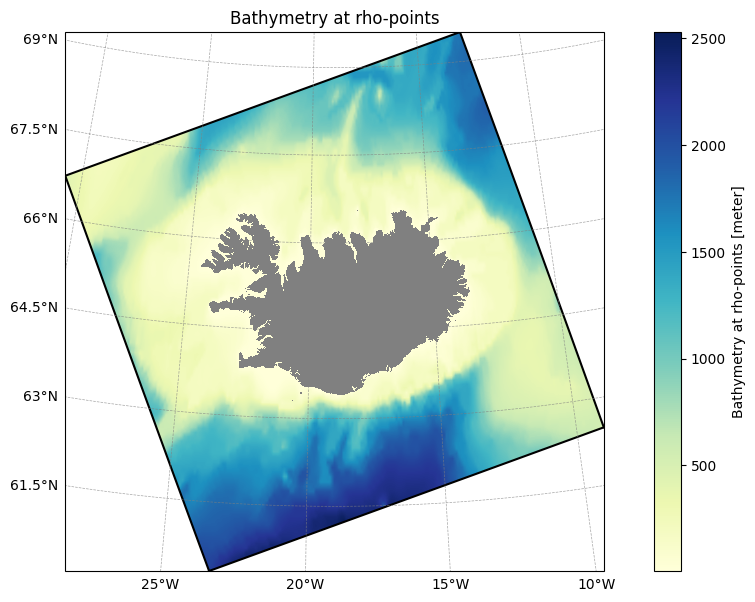

In [39]:
fine_grid.plot()  # grid with ETOPO5 topography

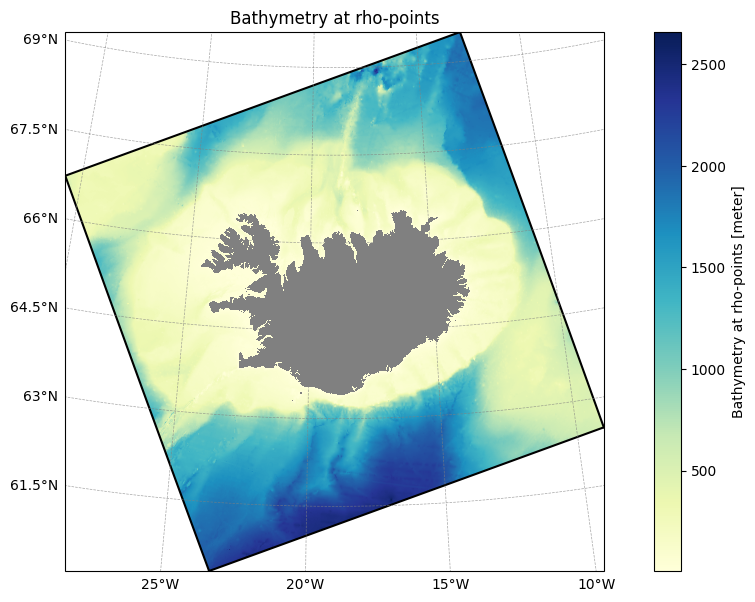

In [40]:
fine_grid_SRTM15.plot()  # grid with SRTM15 topography

The two figures above reveal differences: the topography generated with the SRTM15 data shows a lot more detail. If we moved to an even finer resolution, these differences would become even more pronounced.

### The minimal ocean depth `hmin`

The default for `hmin` is 5 meters. In the above examples, we did not specify the (optional) `hmin` parameter, so it was set to the default value.

In [41]:
fine_grid.hmin

5.0

Let's confirm that the minimum ocean depth is indeed at least 5 meters.

In [42]:
fine_grid.ds["h"].min()

<xarray.DataArray 'h' ()> Size: 8B
array(5.)

We can define a grid with a different `hmin`.

In [43]:
%%time

fine_grid_with_larger_hmin = Grid(
    nx=5000,
    ny=5000,
    **iceland_kwargs,
    verbose=True,
    hmin=10.0,  # Minimum ocean depth in meters (default: 5.0)
)

2026-02-03 12:42:17 - INFO - === Creating the horizontal grid ===
2026-02-03 12:42:54 - INFO - Total time: 36.203 seconds
2026-02-03 12:42:54 - INFO - ================================================================================================
2026-02-03 12:42:54 - INFO - === Deriving the mask from coastlines ===
2026-02-03 12:43:27 - INFO - Total time: 33.133 seconds
2026-02-03 12:43:27 - INFO - ================================================================================================
2026-02-03 12:43:27 - INFO - === Generating the topography using ETOPO5 data and hmin = 10.0 meters ===
2026-02-03 12:43:28 - INFO - Reading the topography data: 0.025 seconds
2026-02-03 12:43:28 - INFO - Regridding the topography: 0.855 seconds
2026-02-03 12:43:33 - INFO - Domain-wide topography smoothing: 4.290 seconds
2026-02-03 12:44:12 - INFO - Local topography smoothing: 38.924 seconds
2026-02-03 12:44:12 - INFO - Total time: 44.197 seconds
2026-02-03 12:44:12 - INFO - ===================

CPU times: user 1min 41s, sys: 13.8 s, total: 1min 54s
Wall time: 1min 54s


In [44]:
fine_grid_with_larger_hmin.ds["h"].min()

<xarray.DataArray 'h' ()> Size: 8B
array(10.)

### Updating topography and `hmin`

When working with a grid that has a large number of grid points, such as `nx` = `ny` = 5000 in the example above, Steps I and II (creating the horizontal grid and land mask) can be quite time-consuming: it took about 40 + 30 = 70 seconds! If you simply want to repeat Step III, which involves updating the topography and/or `hmin`, but you would like to keep the same horizontal grid and mask, you can skip Steps I, II, and IV. This can be easily achieved using the `.update_topography` method. In the next cell, we take our fine resolution grid with ETOPO5 topography, and update it with SRTM15 topography and a larger `hmin` of 10 meters.

In [45]:
%%time

fine_grid.update_topography(
    hmin=10.0,
    topography_source={
        "name": "SRTM15",
        "path": "/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    verbose=True,
)

2026-02-03 12:44:12 - INFO - === Generating the topography using SRTM15 data and hmin = 10.0 meters ===
2026-02-03 12:44:12 - INFO - Reading the topography data: 0.019 seconds
2026-02-03 12:44:14 - INFO - Regridding the topography: 1.407 seconds
2026-02-03 12:44:18 - INFO - Domain-wide topography smoothing: 4.253 seconds
2026-02-03 12:45:16 - INFO - Local topography smoothing: 58.401 seconds
2026-02-03 12:45:16 - INFO - Total time: 64.388 seconds
2026-02-03 12:45:16 - INFO - ================================================================================================


CPU times: user 53.4 s, sys: 11.4 s, total: 1min 4s
Wall time: 1min 4s


From the printed output, you can see that Steps I, II, and IV were skipped as desired. The following confirms that the `topography_source` and `hmin` were indeed updated.

In [46]:
fine_grid

Grid(nx=5000, ny=5000, size_x=800, size_y=800, center_lon=-19, center_lat=65, rot=20, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=10.0, verbose=True, straddle=False)

## The vertical coordinate system

[Here](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system) you can find an overview of the steps involved in creating the vertical coordinate system.

To prepare the vertical coordinate system, `ROMS-Tools` needs the following parameters:

* `N`: the number of vertical layers (default: 100)
* `theta_s`: the surface control parameter (default: 5.0)
* `theta_b`: the bottom control parameter (default: 2.0)
* `hc`: the critical depth in meters (default: 300.0)

In the above examples, we did not specify the last three parameters, so they were set to the default values.

In [50]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

In [51]:
print(f"N: {grid.N}, theta_s: {grid.theta_s}, theta_b: {grid.theta_b}, hc: {grid.hc}")

N: 100, theta_s: 5.0, theta_b: 2.0, hc: 300.0


Among the [steps involved in generating the vertical coordinate system](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system), only the first two are executed during grid generation. 
Specifically, the `grid.ds` object contains the vertical stretched coordinates (`sigma_r` and `sigma_w`), as well as the vertical stretching functions (`Cs_r` and `Cs_w`).

In [52]:
grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB 57.27 57.26 ... 64.56 64.48
    lon_rho       (eta_rho, xi_rho) float64 508kB 315.8 316.0 ... 22.61 22.7
    lat_u         (eta_rho, xi_u) float64 506kB 57.27 57.26 57.25 ... 64.6 64.52
    lon_u         (eta_rho, xi_u) float64 506kB 315.9 316.1 ... 22.56 22.66
    lat_v         (eta_v, xi_rho) float64 506kB 57.31 57.31 57.3 ... 64.54 64.46
    lon_v         (eta_v, xi_rho) float64 506kB 315.8 316.0 ... 22.52 22.61
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB 57.23 57.22 ... 64.46
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB 315.8 316.1 ... 22.84
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB -0.05794 -0.05794 ... -1.102
    f             (eta_rho, xi_rho) float64 508kB 0.0001223 ... 0.0001313
    pm            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    pn            (eta_rho, xi_rho) float64 508kB 0.0001019 ... 0.0001019
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 254kB 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB 1 1 1 1 1 1 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 508kB 3.386e+03 3.386e+03 ... 71.21
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes: (12/15)
    title:                   ROMS grid created by ROMS-Tools
    roms_tools_version:      3.4.1.dev6+g4ece8caa3
    size_x:                  2500
    size_y:                  2500
    center_lon:              -15
    center_lat:              65
    ...                      ...
    topography_source_path:  /anvil/projects/x-ees250129/Datasets/SRTM15/SRTM...
    hmin:                    5.0
    theta_s:                 5.0
    theta_b:                 2.0
    hc:                      300.0
    mask_shapefile:          /anvil/projects/x-ees250129/Datasets/GSHHS/gshhg...

Text(0.5, 1.0, 'Vertical stretching function at rho-points')

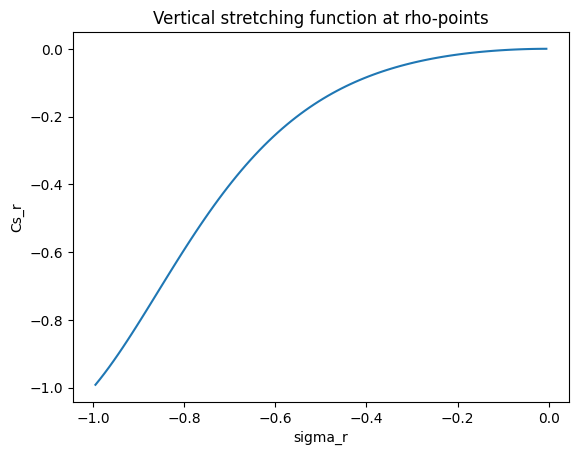

In [53]:
import matplotlib.pyplot as plt

plt.plot(grid.ds.sigma_r, grid.ds.Cs_r)
plt.xlabel("sigma_r")
plt.ylabel("Cs_r")
plt.title("Vertical stretching function at rho-points")

The vertical stretching functions, along with the topography, are used to compute the depth of the layers and interfaces, as described in step 3 of [this list](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system). Since this step can be computationally expensive and memory-intensive for large grids (e.g., `nx` = `ny` = 5000 as in one of the examples above), `ROMS-Tools` does not compute the layer depths and interfaces during grid generation. Instead, they are calculated later, when needed for generating initial conditions or boundary forcing.

However, if you wish to visualize the layer depths during the grid generation, they can be computed and plotted as demonstrated in the next section.

### Plotting the vertical coordinate system

You can visualize the vertical coordinate system from different perspectives using the `.plot_vertical_coordinate` method. Let's begin by examining the depth of the different layers.

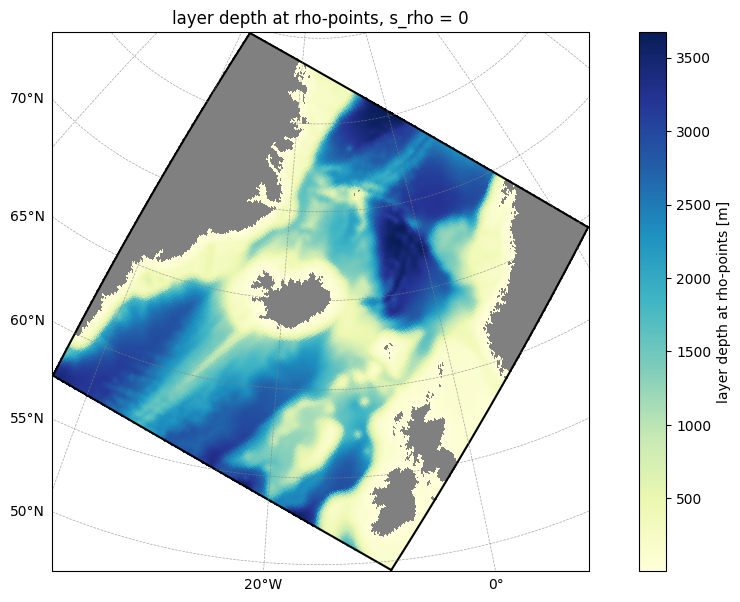

In [54]:
grid.plot_vertical_coordinate(s=0)  # depth of the lowermost layer at rho-points

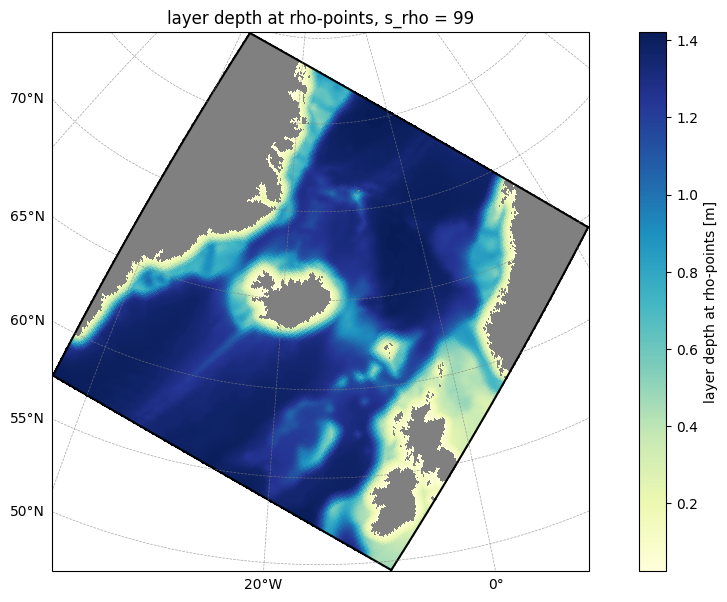

In [55]:
grid.plot_vertical_coordinate(s=-1)  # depth of the uppermost layer at rho-points

We are now interested in a vertical view of our layers. We can look at a transect by slicing through the `eta` or `xi` dimensions.

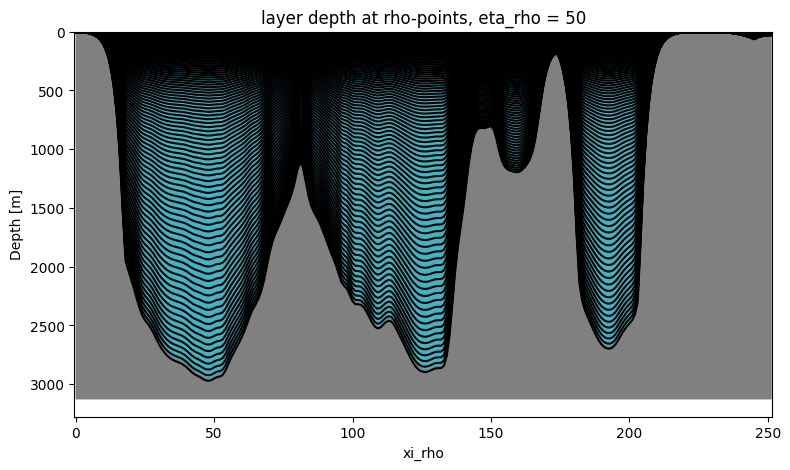

In [56]:
grid.plot_vertical_coordinate(eta=50)

The upper ocean layers are so densely packed that the lines converge and become indistinguishable. 

To address this, we offer an option to limit the number of plotted layers by specifying a maximum.

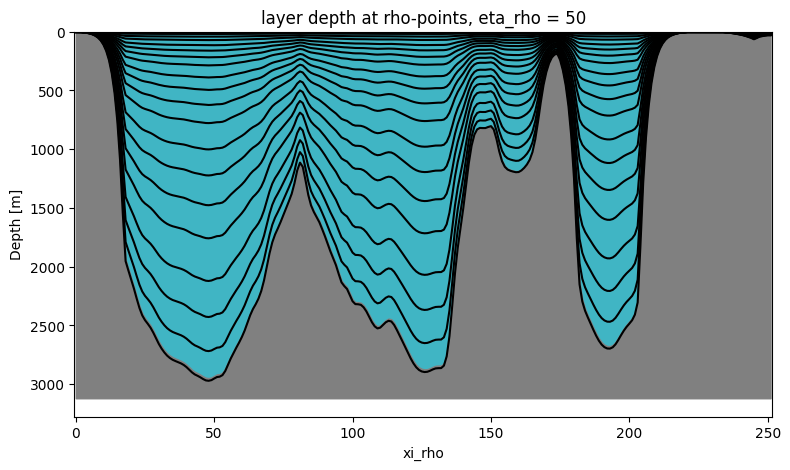

In [57]:
grid.plot_vertical_coordinate(eta=50, max_nr_layer_contours=20)

### Vertical coordinate system parameters

To examine the vertical coordinate system parameters, we begin with a control grid containing just 20 vertical layers—small enough to clearly distinguish variations in the vertical plots.

In [58]:
fixed_grid_parameters = {
    "nx": 100,
    "ny": 100,
    "size_x": 1800,
    "size_y": 2400,
    "center_lon": -21,
    "center_lat": 61,
    "rot": 20,
    "N": 20,
}

In [59]:
control_grid = Grid(
    **fixed_grid_parameters,
    theta_s=5.0,
    theta_b=2.0,
    hc=300.0,
)

In [60]:
control_grid

Grid(nx=100, ny=100, size_x=1800, size_y=2400, center_lon=-21, center_lat=61, rot=20, N=20, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'ETOPO5'}, hmin=5.0, verbose=False, straddle=False)

We will now change the vertical coordinate system parameters `theta_s`, `theta_b`, and `hc`, and see what effect this has.

#### Critical depth

The critical depth `hc` sets the transition between flat $z$-levels in the upper ocean and terrain-following sigma-levels below. Usually we want to choose `hc` to be comparable with the expected depth of the pycnocline. That being said, let's experiment with the `hc` parameter. 

In [61]:
grid_with_large_critical_depth = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=control_grid.theta_b,
    hc=1000.0,
)

grid_with_small_critical_depth = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=control_grid.theta_b,
    hc=50.0,
)

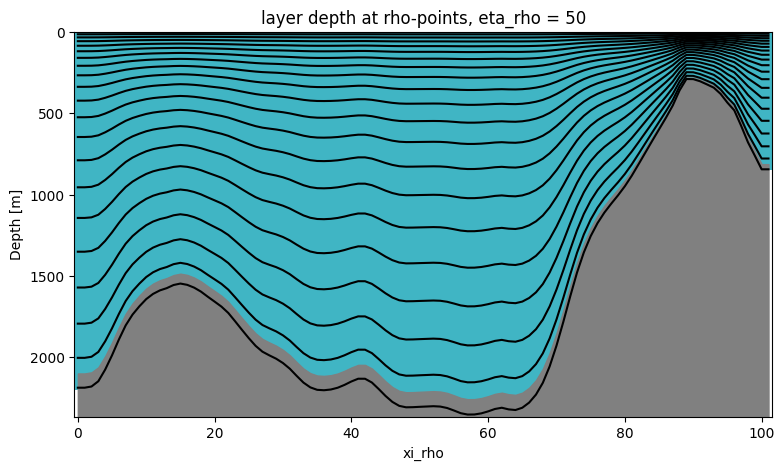

In [62]:
control_grid.plot_vertical_coordinate(eta=50)

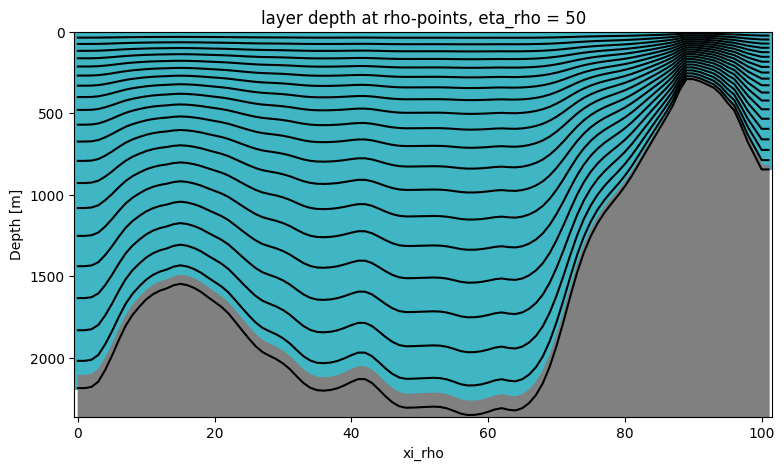

In [63]:
grid_with_large_critical_depth.plot_vertical_coordinate(eta=50)

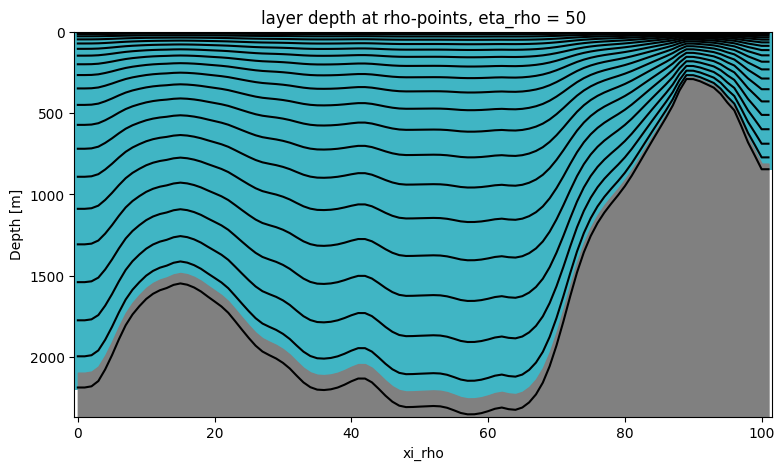

In [64]:
grid_with_small_critical_depth.plot_vertical_coordinate(eta=50)

When comparing the three plots above, we observe that 

* increasing `hc` results in a higher proportion of the upper ocean having nearly evenly spaced levels. It's important to note that despite setting `hc` to 1000m in the second plot, the evenly spaced levels do not extend all the way down to 1000m. However, in deeper ocean regions (visible in the left part of the plot), we approach this depth threshold more closely.
* reducing `hc` leads to a smaller proportion of the upper ocean having nearly evenly spaced levels.

#### Surface and bottom control parameters

The surface control parameter `theta_s` and bottom control parameter `theta_b` determine how much the vertical grid is stretched near the surface and bottom, respectively. Let's change these two parameters and see what happens.

In [65]:
grid_with_large_theta_s = Grid(
    **fixed_grid_parameters,
    theta_s=10.0,
    theta_b=control_grid.theta_b,
    hc=control_grid.hc
)

grid_with_small_theta_s = Grid(
    **fixed_grid_parameters,
    theta_s=2.0,
    theta_b=control_grid.theta_b,
    hc=control_grid.hc
)

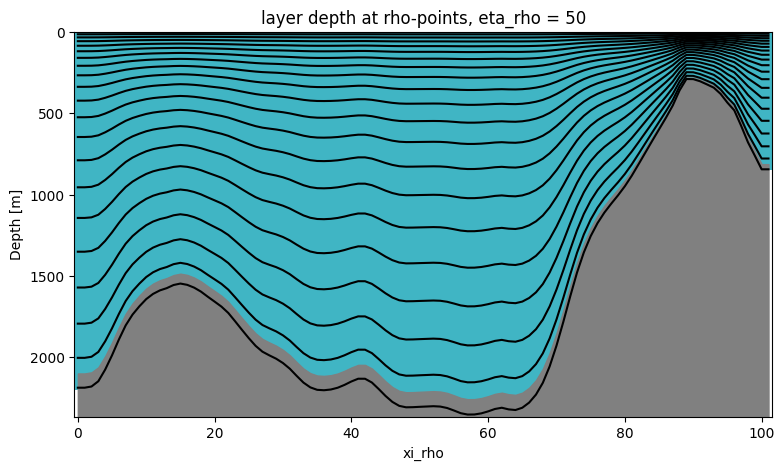

In [66]:
control_grid.plot_vertical_coordinate(eta=50)

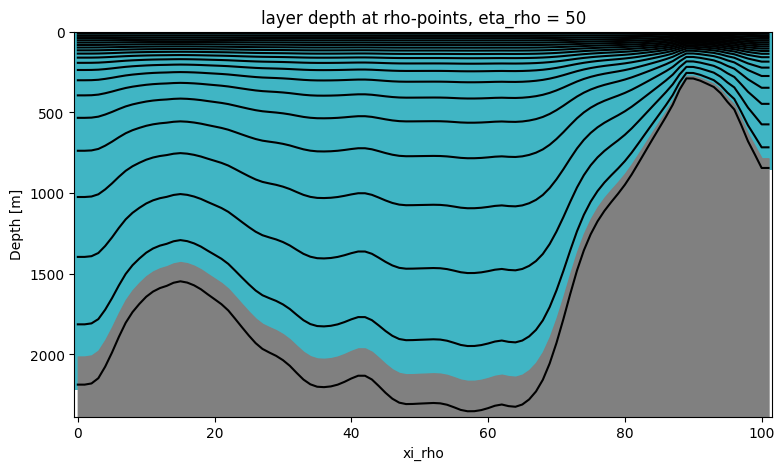

In [67]:
grid_with_large_theta_s.plot_vertical_coordinate(eta=50)

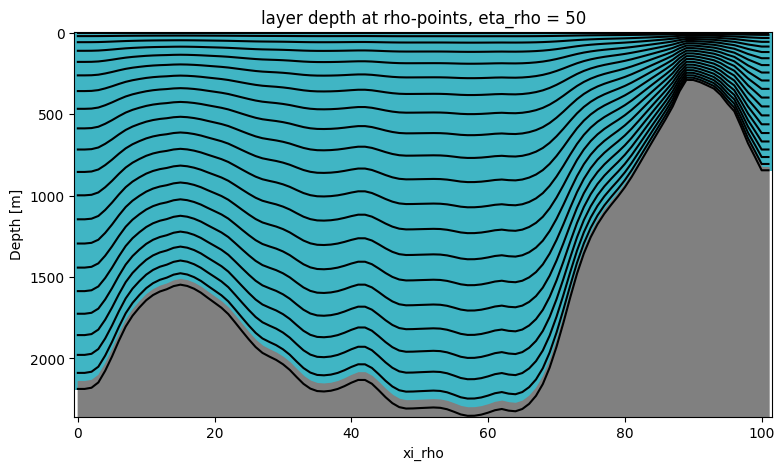

In [68]:
grid_with_small_theta_s.plot_vertical_coordinate(eta=50)

When comparing the three plots above, we can see that 

* increasing `theta_s` leads to a refinement of the vertical grid near the surface,
* reducing `theta_s` leads to coarsening of the vertical grid near the surface.

We can play a similar game with the bottom control parameter `theta_b`.

In [69]:
grid_with_large_theta_b = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=6.0,
    hc=control_grid.hc
)

grid_with_small_theta_b = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=0.5,
    hc=control_grid.hc
)

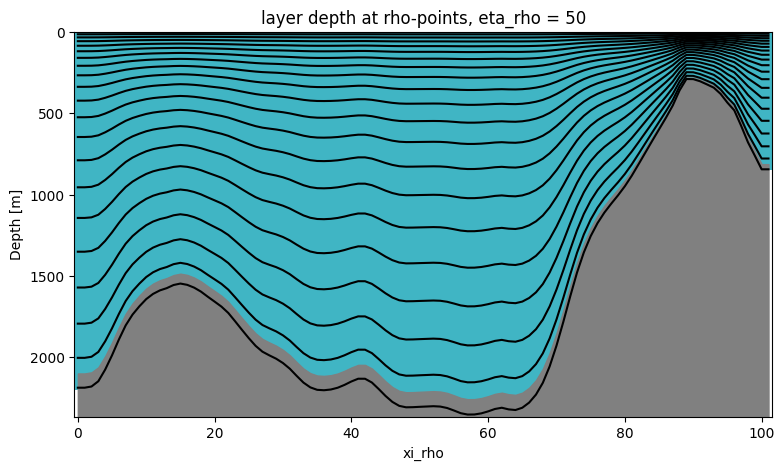

In [70]:
control_grid.plot_vertical_coordinate(eta=50)

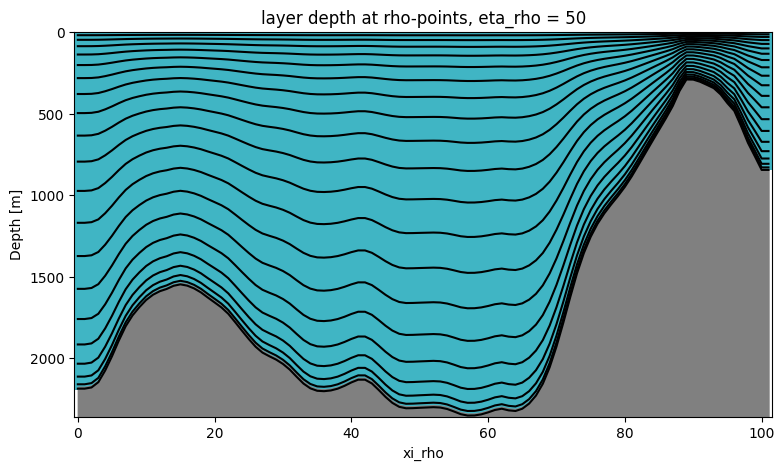

In [71]:
grid_with_large_theta_b.plot_vertical_coordinate(eta=50)

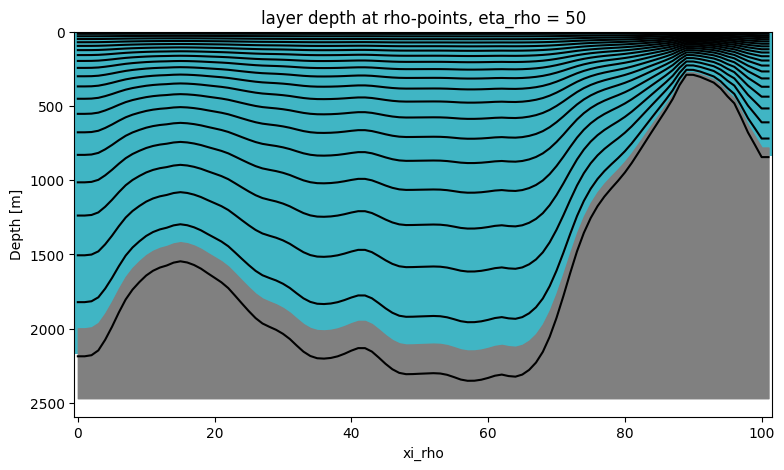

In [72]:
grid_with_small_theta_b.plot_vertical_coordinate(eta=50)

Again, comparing the three plots above, we can see that 

* increasing `theta_b` leads to a refinement of the vertical grid near the bottom,
* reducing `theta_b` leads to coarsening of the vertical grid near the bottom.

### Updating the vertical coordinate system

If you want to update the vertical coordinate system but would like to keep the same horizontal grid, mask and topography, you can skip Steps I, II, and III. 
This can be easily achieved using the `.update_vertical_coordinate` method.  Let's update the grid that we created at the very beginning of this notebook.

In [73]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

In [74]:
grid.update_vertical_coordinate(N=10, theta_s=1.0, verbose=True)

2026-02-03 12:46:00 - INFO - === Preparing the vertical coordinate system using N = 10, theta_s = 1.0, theta_b = 2.0, hc = 300.0 ===
2026-02-03 12:46:00 - INFO - Total time: 0.004 seconds
2026-02-03 12:46:00 - INFO - ================================================================================================


In the cell above, we regenerated the vertical coordinate system of our original grid, but this time only with 10 layers and `theta_s = 1.0`.

In [75]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=10, theta_s=1.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/anvil/projects/x-ees250129/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

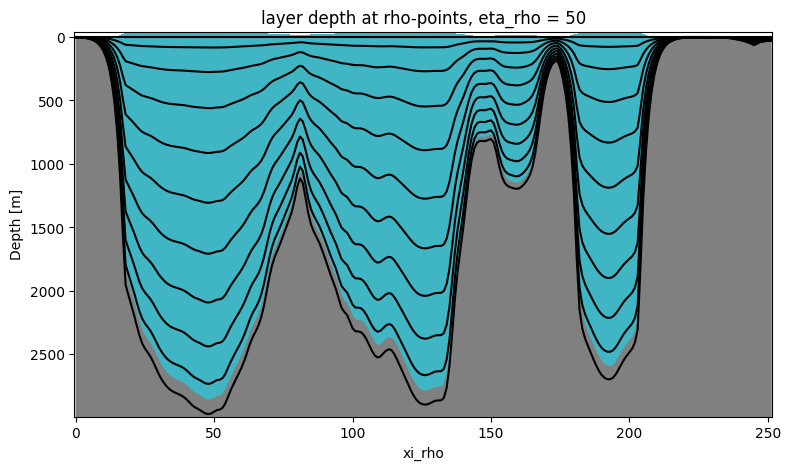

In [76]:
grid.plot_vertical_coordinate(eta=50)